# 911 Calls Data Analysis

## Data and Setup

### Import numpy, pandas, other visualization libraries and set %matplotlib inline

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [367]:
plt.rcParams['figure.figsize'] = (4.5,3.5)
sns.set_style('whitegrid')
sns.set_context(context='notebook', font_scale=0.7)

In [368]:
df = pd.read_csv('911.csv')

In [369]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [370]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [371]:
df['e'].value_counts()

e
1    99492
Name: count, dtype: int64

### Basic Questions

#### What are the top 5 Zipcodes for 911 calls

In [374]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

- These are zip codes where the maximum number of calls are coming from

### What are top 5 townships(twp) for 911 calls?

In [377]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

#### Take a look at the title column, how many unique title codes are there?

In [379]:
df.nunique()

lat          14579
lng          14586
desc         99455
zip            104
title          110
timeStamp    72577
twp             68
addr         21914
e                1
dtype: int64

In [380]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [381]:
len(df['title'].unique())

110

## Creating new features

#### In the titles column there are 'Reasons/Departments" specified before the title code. These are EMS, Fire and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason " that contains this string values.

#### For Example, If the title column value is EMS: BACK PAINS/INJURY, the reason column value should be EMS.

In [384]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [385]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


#### What is the most common Reason for a 911 call based off this new column(Reason)

In [387]:
values = df['timeStamp'].value_counts()
values

timeStamp
2015-12-10 17:40:01    8
2016-04-21 17:57:01    7
2015-12-23 14:12:01    7
2016-02-14 14:02:01    6
2016-03-09 16:57:01    6
                      ..
2016-03-18 11:01:01    1
2016-03-18 11:02:00    1
2016-03-18 11:02:01    1
2016-03-18 11:07:01    1
2016-08-24 11:17:02    1
Name: count, Length: 72577, dtype: int64

#### Now use seaborn to create a countplot of 911 calls by Reason

C:\Users\Shaik\AppData\Local\Temp\ipykernel_3240\2377940984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= 'Reason', palette='viridis');


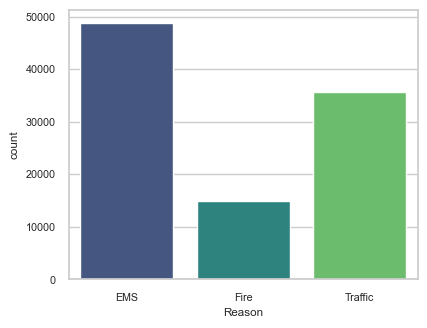

In [527]:
sns.countplot(data = df, x= 'Reason', palette='viridis');

- If you look at the calls for EMS it is around 48k
- For fire it was 13-15k
- For Traffic it was >30k and and <36k

#### Now let us begin to focus on time information. What is the data type of the objects in the time Stamp column?

In [392]:
df['timeStamp'].dtype
print(df['timeStamp'].dtype)

object


In [393]:
type(df['timeStamp'][0])

str

#### Use pd.to_datetime to convert the column fro strings to Date Time Objects.

In [395]:

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [396]:
df['timeStamp'].dtype

dtype('<M8[ns]')

In [397]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### You can no wgrab specific attributes from a Datetime object by caling them . For example

 time = df['timeStamp'].iloc[0]

 time.hour

#### We can use jupyters tab method to explore the various attributes that we can call>Now that the timestamp column are actually DateTime Objects , use .apply to create 3 new columns called Hour, Month and Day of week. You will create this columns based off of the timeStamp column.

In [399]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [400]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of week'] = df['timeStamp'].apply(lambda x: x.day_of_week)


In [401]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [402]:
df['Month'].value_counts()



Month
1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: count, dtype: int64

In [403]:
df['Hour'].value_counts()


Hour
17    6517
16    6490
15    6154
12    6029
14    5997
13    5967
18    5762
11    5543
10    5413
9     5314
8     5044
19    4908
20    4377
7     3970
21    3788
22    3283
23    2559
6     2513
0     2112
1     1721
5     1629
2     1549
3     1435
4     1418
Name: count, dtype: int64

In [404]:
df['Day of week'].value_counts()

Day of week
1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: count, dtype: int64

#### Notice how the Day of the Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names of the day of the week:

                            dmap = {'0' :'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri',5:'Sat', 6:'Sun'}

In [406]:
dmap = {0 :'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri',5:'Sat', 6:'Sun'}

In [407]:
df['Day of week'] = df['Day of week'].map(dmap)

In [408]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [409]:
df['Day of week'].value_counts()

Day of week
Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: count, dtype: int64

#### Now use Seaborn to create a countplot of the Day of the week column with the hue based off of the reason column.

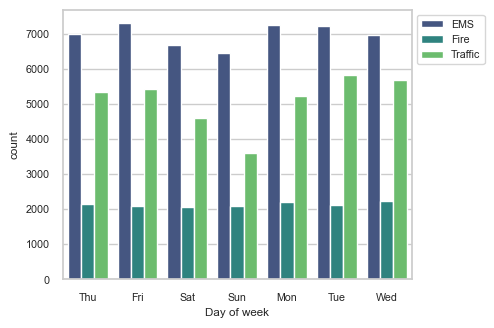

In [411]:
sns.countplot(data = df , x = 'Day of week', hue ='Reason', palette = 'viridis')
plt.legend(bbox_to_anchor=(1,1))

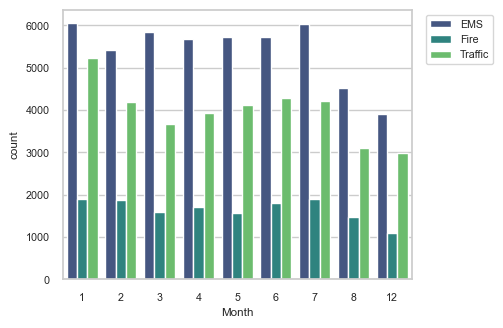

In [412]:
sns.countplot(data = df , x = 'Month', hue ='Reason', palette = 'viridis')
plt.legend(bbox_to_anchor=(1.25,1))

#### Did you notice anything strange about the plot?

- You should have notice that some months(sep,oct, and Nov) are missing lets see if we can fill the information by plotting the information in another way, possiby a simple line plot that fills in the missing months, in order to do this , we need to work with pandas again.

#### Now create a groupby object called byMonth, where you group the dataframe by the month column and use the count method for aggregation. Use the head() method on this returned DataFrame.

In [415]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


#### Now create a simple plot off the dataframe indicating the count of calls per month?      

<Axes: xlabel='Month'>

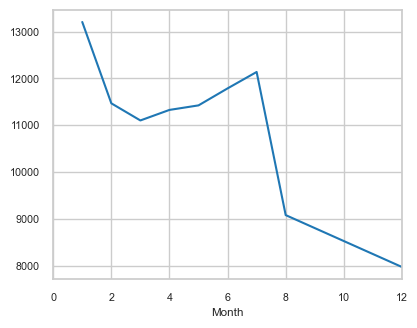

In [417]:
byMonth.plot(kind='line', y='e', legend = False, xlim=(0,12))

- What we see here is number of calls comes down from january and goes up again during the summer months and and falls of drastically off October and december months.
- This also produces an estimated value for the number of calls, for the missing months.

#### Now see if you can use seaborn's lmplot to create a linear fit on the number per month.Keep in mind you may need to reset the index to a column.

In [420]:
byMonth.reset_index(inplace=True)
byMonth

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


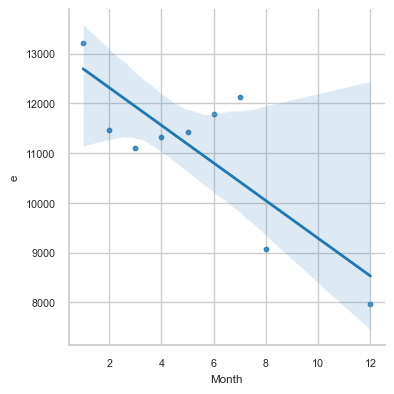

In [421]:
sns.lmplot(data = byMonth, x = 'Month' ,y= 'e', height=4, scatter_kws= {'s':10}, line_kws={'lw':2}) #scatter_kws-> s represents the size

- The shadow represents the error
- What we see is as we go from january to decemeber, The regression analysis is showing that number of calls per month goes lower and lower .
- However if you see the the scattered point it goes down and then it goes up again before it crashes in august and december
- -Thats why its showing a much larger margin of error there over the shadow portion.
- So the actual data points could lie anywhere between 8500 to 12000 for the month October.so it desnt give a good fit here because of this high error.

#### Create a new column called 'Date' that contains the date from the rimestamp column. You will need to use  apply along with the .date() method.

In [424]:
df['Date']= df['timeStamp'].apply(lambda x:x.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [425]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [426]:
type(df['Date'][0])

datetime.date

#### Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

In [428]:
byDate = df.groupby('Date').count()

In [429]:
byDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


In [430]:
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [431]:
byDate.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389
2016-08-23,439,439,439,390,439,439,439,437,439,439,439,439,439
2016-08-24,132,132,132,106,132,132,132,132,132,132,132,132,132


<Axes: xlabel='Date'>

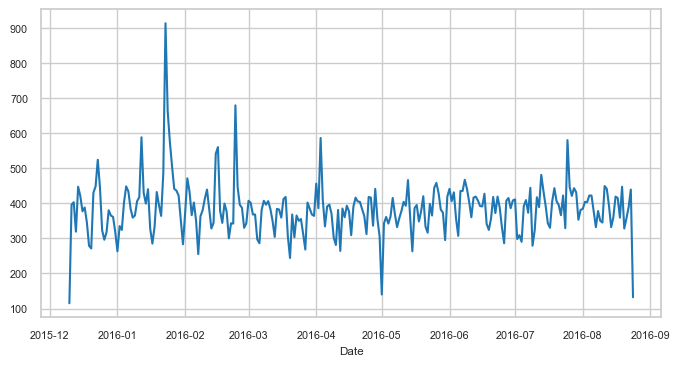

In [432]:
byDate.plot(kind='line', y ='e', figsize=(8,4), legend = False)

- The data actually starts from 2015 , then it goes till the 8th month i.e, is August of 2016.
- In the begining i have predicted that we might have a missing data in the year 2016 rather this graph explains us that the data starts somewhere in the month of december  in 2015 and continues only till 2016.
- The data starts from 10th of Dec 2015 till 24th of August 2016.
- The number of calls is less in August and Decmeber because we do not have the data of the complete months.
- If you analyse this data this is the total calls byDate,  On any individual day it looks like the total number of calls varies between 300 and 450 calls with spikes on certain days.


#### Now recreate the plot but create 3 separate plots with each plot representing a Reason for the call

In [435]:
byDateTraffic = df[df['Reason'] == 'Traffic'].groupby('Date').count()
byDateTraffic.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186


<Axes: title={'center': 'Traffic'}, xlabel='Date'>

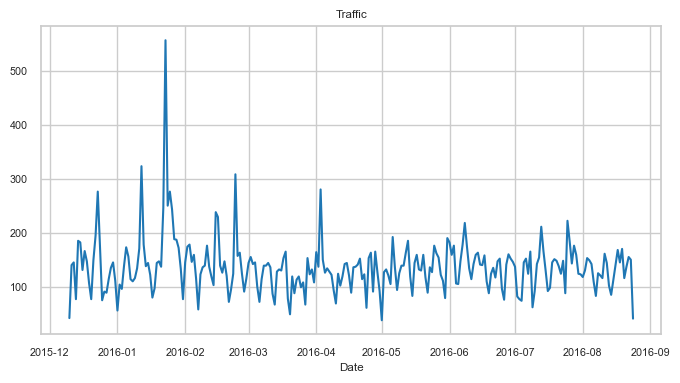

In [436]:
byDateTraffic.plot(kind='line', y='e' , figsize=(8,4), legend=False, title = 'Traffic')

- If you see the graph for the traffic reason , the number of calls are varying between 80 and 200 with spikes on certain days.

In [438]:
byDateFire = df[df['Reason'] == 'Fire'].groupby('Date').count()
byDateFire.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39


<Axes: title={'center': 'Fire'}, xlabel='Date'>

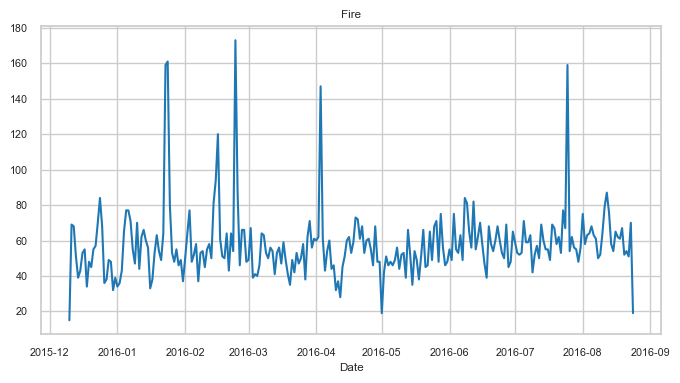

In [439]:
byDateFire.plot(kind='line', y='e' , figsize=(8,4), legend=False, title = 'Fire')

- If you see the graph for the Fire reason the number of calls on each day varies in between 30 to 80 calls on a normal days with a spike on certain days.

In [441]:
byDateEMS = df[df['Reason'] == 'EMS'].groupby('Date').count()
byDateEMS.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222


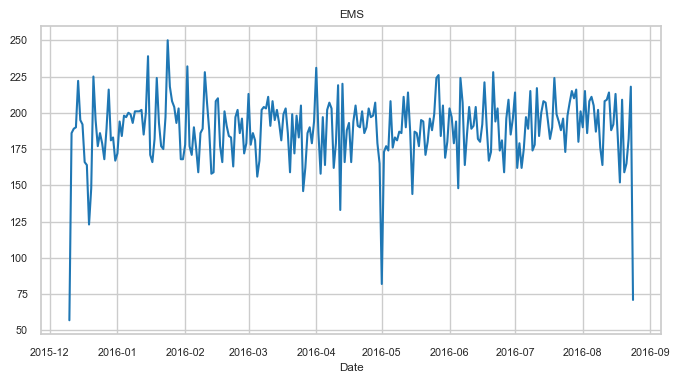

In [442]:
byDateEMS.plot(kind = 'line', y = 'e',  figsize=(8,4), legend=False, title = 'EMS');

- Here it looks like the calls vary between 150 and 225 with spikes on downward direction at the end of april or first of may.

#### Now lets move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the day of the week. There are a lots of ways to do this , but I would recommend trying to combine group by with an unstack method.

In [445]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


- The easiest way to do this is using pivot table. If you check the dataframe we have added the new columns Reason, Hour Month and Day of the week and Date. What I want here is, 'Day of week' to be the index and the hour column actually be the columns and the hour varies between 0 to 23.
- So I want 24 columns for each hour of day and seven rows for each day of the week.
- Easiest way to to it is using the pivot table.

In [447]:
df.pivot_table(index = 'Day of week', columns = 'Hour', values = 'e', aggfunc = 'sum')

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [448]:
## Getting the same results using unstack method
## Here we use the groupby method and rather than grouping by single column, we will pass in a list of two columns and that
## will produce a multi index dataframe

df.groupby(['Day of week', 'Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

- If  we observe the dataframe we can see two indexes here one is 'Day of Week' and 'Hour' for each day of the week

In [450]:
## Lets use unstack on it 

byDayHour = df.groupby(['Day of week', 'Hour']).count()['e'].unstack()
byDayHour


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


- This is a 7 x 24 df . We have seven days of the week and 24 hours of the day ranging from 0 to 23 and we have the sum that is the count for each row which has 'e' value as 1

#### Now create a HeatMap using this DataFrame.

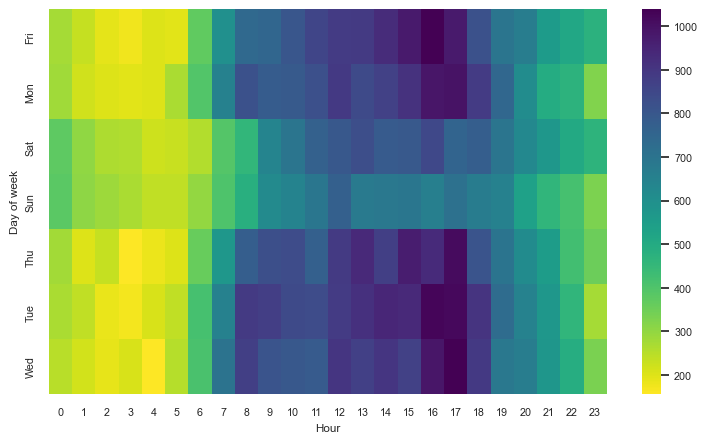

In [453]:
plt.figure(figsize=(9,5))
sns.heatmap(data = byDayHour, cmap = 'viridis_r');

- If you see the color bar the darker color has the higher value and the lighter color has the lower value.
- We have the days of the week on the y axis and hours of the day on the x axis.
- At midnight i.e, between 01 A.M to 5 A.M the values are lower and if you go through the day from the morning to the afternoon and evening the the colors become darker and darker thrpught the day and starts getting lighter again as you reach 9 P.m, 10 P.m and 11 P.m.
- If you look at the Y axis the days of the week sat and sun has lighter colors compared to the other days of the week
- The number of calls increased as you go through the day.
- Most of the calls have been around three to seven in the evening and similiarly most of the calls happen on the weekdays than on the weekends.


#### Create a clustermap using the dataframe

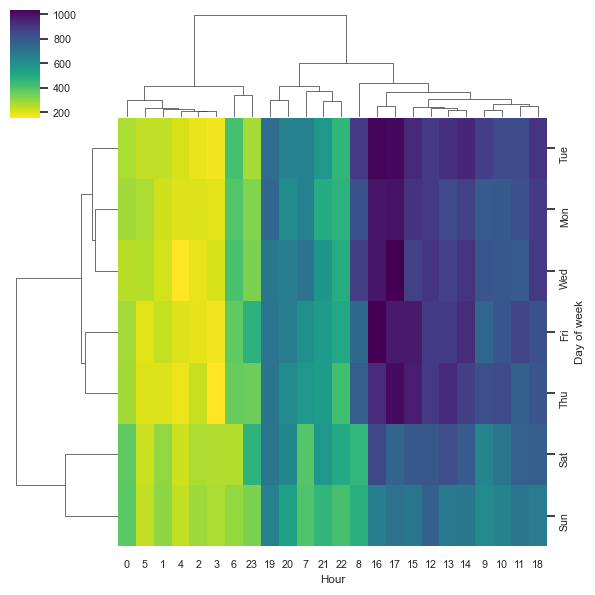

In [456]:

sns.clustermap(data =byDayHour, cmap= 'viridis_r',figsize=(6, 6));

#### Lets repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [458]:
byDayMonth = df.groupby(['Day of week', 'Month']).count()['e'].unstack()
byDayMonth

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


- We have our days on the row index and months on the column  and we have total number of calls and the data is given as a form of matrix where the actual data relates to the column and row index.
  

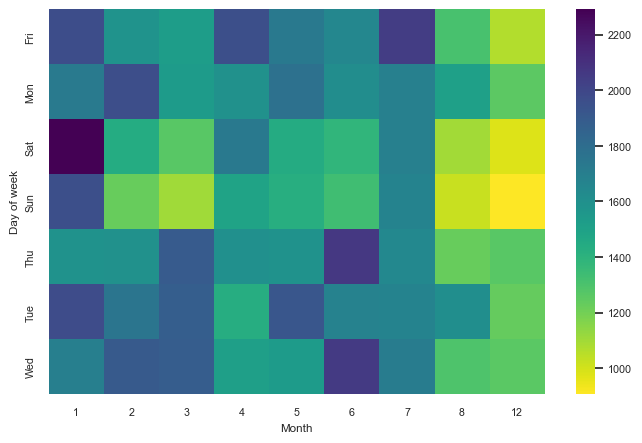

In [460]:
plt.figure(figsize=(8,5))
sns.heatmap(data = byDayMonth, cmap = 'viridis_r');

- So here we have the day data on thr row index and the month data on the column index.
- Analysing earlier i have realised that the data actually starts from december 10th of 2015 and went till 24 th of august 2016.
- -The data was incompte for the months december and august so obiviously number of calls were lesser compared to other months.


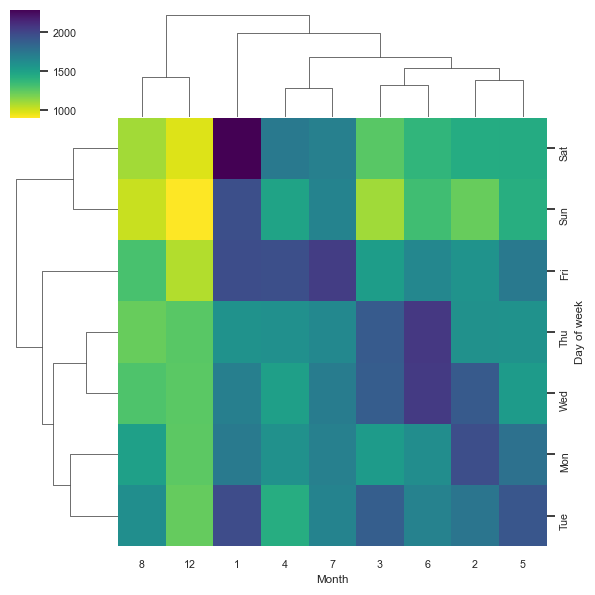

In [462]:
sns.clustermap(data = byDayMonth, cmap = 'viridis_r', figsize=(6,6));

### Observations
- In this Project Its seen that more calls are made on weekdays than on weekends.
- And also more calls were made on late afternoon and evening hours than compared to late nighs and morning hours
- That kind of make sense as people are more active during these times so there would be more traffic calls or maybe EMS calls.
- However there was no pattern observed for months data partly due to the missing daa for the fall and the winter months.
- If the missing data is found then it could be analysed for the different reasons for summer and winter months as there could be more fire incidents in the summers and more traffic related calls in the winter months.